<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Example-pre-processing-for-MEG-and-EEG-T-maze-data" data-toc-modified-id="Example-pre-processing-for-MEG-and-EEG-T-maze-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Example pre-processing for MEG and EEG T-maze data</a></span><ul class="toc-item"><li><span><a href="#Import-all-libraries" data-toc-modified-id="Import-all-libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import all libraries</a></span></li><li><span><a href="#Load-the-data-and-concatenate-the-raw-files" data-toc-modified-id="Load-the-data-and-concatenate-the-raw-files-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Load the data and concatenate the raw files</a></span></li><li><span><a href="#Review-basic-raw-file-properties" data-toc-modified-id="Review-basic-raw-file-properties-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Review basic raw file properties</a></span></li><li><span><a href="#Event-structure" data-toc-modified-id="Event-structure-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Event structure</a></span></li><li><span><a href="#Pre-processing" data-toc-modified-id="Pre-processing-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Pre-processing</a></span><ul class="toc-item"><li><span><a href="#Review-artifacts" data-toc-modified-id="Review-artifacts-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Review artifacts</a></span></li><li><span><a href="#Filtering-and-ICA" data-toc-modified-id="Filtering-and-ICA-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Filtering and ICA</a></span></li><li><span><a href="#Automatic-artifact-component-detection" data-toc-modified-id="Automatic-artifact-component-detection-1.5.3"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>Automatic artifact component detection</a></span></li></ul></li></ul></li><li><span><a href="#Segmentation-and-averaged-ERPs" data-toc-modified-id="Segmentation-and-averaged-ERPs-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Segmentation and averaged ERPs</a></span><ul class="toc-item"><li><span><a href="#Referencing-and-segmentation" data-toc-modified-id="Referencing-and-segmentation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Referencing and segmentation</a></span></li><li><span><a href="#Plotting-topographies" data-toc-modified-id="Plotting-topographies-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Plotting topographies</a></span></li><li><span><a href="#Plotting-channels" data-toc-modified-id="Plotting-channels-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Plotting channels</a></span></li></ul></li></ul></div>

# Example pre-processing for MEG and EEG T-maze data

## Import all libraries

In [2]:
import os
import numpy as np

import matplotlib.pyplot as plt

import mne
from mne.preprocessing import ICA
from mne.time_frequency import tfr_morlet

## Load the data and concatenate the raw files

In [7]:
# Set the directory and file name
sample_data_folder = '/Volumes/Malte/MEGEEG_project/MEG/Data/Backup/'
sample_data_raw_file1 = os.path.join(sample_data_folder, '0001_Maze_20061022_06.ds')
sample_data_raw_file2 = os.path.join(sample_data_folder, '0001_Maze_20061022_07.ds')

montage = mne.channels.make_standard_montage(kind='standard_1005')

# Read the first file
raw1 = mne.io.read_raw_ctf(sample_data_raw_file1, preload=True)

ds directory : /Volumes/Malte/MEGEEG_project/MEG/Data/Backup/0001_Maze_20061022_06.ds
    res4 data read.
    hc data read.
    Separate EEG position data file read.
    Quaternion matching (desired vs. transformed):
      -7.88   67.27    0.00 mm <->   -7.88   67.27    0.00 mm (orig :  -41.66   55.67 -276.85 mm) diff =    0.000 mm
       7.88  -67.27   -0.00 mm <->    7.88  -67.27   -0.00 mm (orig :   69.57  -21.28 -269.46 mm) diff =    0.000 mm
      80.83    0.00    0.00 mm <->   80.83   -0.00   -0.00 mm (orig :   66.47   77.62 -261.99 mm) diff =    0.000 mm
    Coordinate transformations established.
    Polhemus data for 3 HPI coils added
    Device coordinate locations for 3 HPI coils added
    6 EEG electrode locations assigned to channel info.
    6 EEG locations added to Polhemus data.
    Measurement info composed.
Finding samples for /Volumes/Malte/MEGEEG_project/MEG/Data/Backup/0001_Maze_20061022_06.ds/0001_Maze_20061022_06.meg4: 
    System clock channel is available, chec

In [8]:
# For setting the EEG montage, first identify the eog channels which cannot be recognized from standard digital montage names
raw1.set_channel_types({'Saccade': 'eog', 'EEG031': 'eog'})
# Set positions based on names (Fz, Cz, M1, M2) and ignore the two eog channels (missing montage positions allowed)
raw1.set_montage(montage=montage, on_missing='ignore')

<RawCTF | 0001_Maze_20061022_06.meg4, 191 x 288000 (480.0 s), ~420.2 MB, data loaded>

In [9]:
# Now the second file
raw2 = mne.io.read_raw_ctf(sample_data_raw_file2, preload=True)

ds directory : /Volumes/Malte/MEGEEG_project/MEG/Data/Backup/0001_Maze_20061022_07.ds
    res4 data read.
    hc data read.
    Separate EEG position data file read.
    Quaternion matching (desired vs. transformed):
      -7.60   66.99   -0.00 mm <->   -7.60   66.99   -0.00 mm (orig :  -39.71   57.76 -279.28 mm) diff =    0.000 mm
       7.60  -66.99    0.00 mm <->    7.60  -66.99    0.00 mm (orig :   72.18  -17.31 -274.05 mm) diff =    0.000 mm
      81.55    0.00    0.00 mm <->   81.55   -0.00    0.00 mm (orig :   66.96   80.74 -256.29 mm) diff =    0.000 mm
    Coordinate transformations established.
    Polhemus data for 3 HPI coils added
    Device coordinate locations for 3 HPI coils added
    6 EEG electrode locations assigned to channel info.
    6 EEG locations added to Polhemus data.
    Measurement info composed.
Finding samples for /Volumes/Malte/MEGEEG_project/MEG/Data/Backup/0001_Maze_20061022_07.ds/0001_Maze_20061022_07.meg4: 
    System clock channel is available, chec

In [10]:
# Concatenate the two raw files
# No warning messages show, meaning that the two file parameter sets are identical
raw = mne.io.concatenate_raws([raw1, raw2])

## Review basic raw file properties

In [11]:
n_time_samps = raw.n_times
time_secs = raw.times
ch_names = raw.ch_names
n_chan = len(ch_names)

print('The sample data object has {} time samples and {} channels.'
      ''.format(n_time_samps, n_chan))
print('The last time sample is at {} seconds.'.format(time_secs[-1]))
print('The first few channel names are {}.'.format(', '.join(ch_names[:3])))
print()  # insert a blank line in the output
print('Bad channels:', raw.info['bads'])  # chs marked "bad" during acquisition
print('Sampling rate: ', raw.info['sfreq'], 'Hz')            # sampling frequency

The sample data object has 572004 time samples and 191 channels.
The last time sample is at 953.3383333333334 seconds.
The first few channel names are STIM, SCLK01-177, BG1-2511.

Bad channels: []
Sampling rate:  600.0 Hz


In [12]:
# Here is some more detailed info extracted from the file
print(raw.info)

<Info | 16 non-empty values
 bads: []
 ch_names: STIM, SCLK01-177, BG1-2511, BG2-2511, BG3-2511, BP1-2511, ...
 chs: 1 STIM, 1 MISC, 32 REF_MEG, 151 MAG, 4 EEG, 2 EOG
 comps: 5 items (list)
 ctf_head_t: CTF/4D/KIT head -> head transform
 custom_ref_applied: False
 dev_ctf_t: MEG device -> CTF/4D/KIT head transform
 dev_head_t: MEG device -> head transform
 dig: 7 items (3 Cardinal, 4 EEG)
 experimenter: Teresa
 highpass: 0.0 Hz
 hpi_results: 1 item (list)
 lowpass: 300.0 Hz
 meas_date: 2006-10-22 13:39:57 UTC
 meas_id: 4 items (dict)
 nchan: 191
 projs: []
 sfreq: 600.0 Hz
 subject_info: 1 item (dict)
>


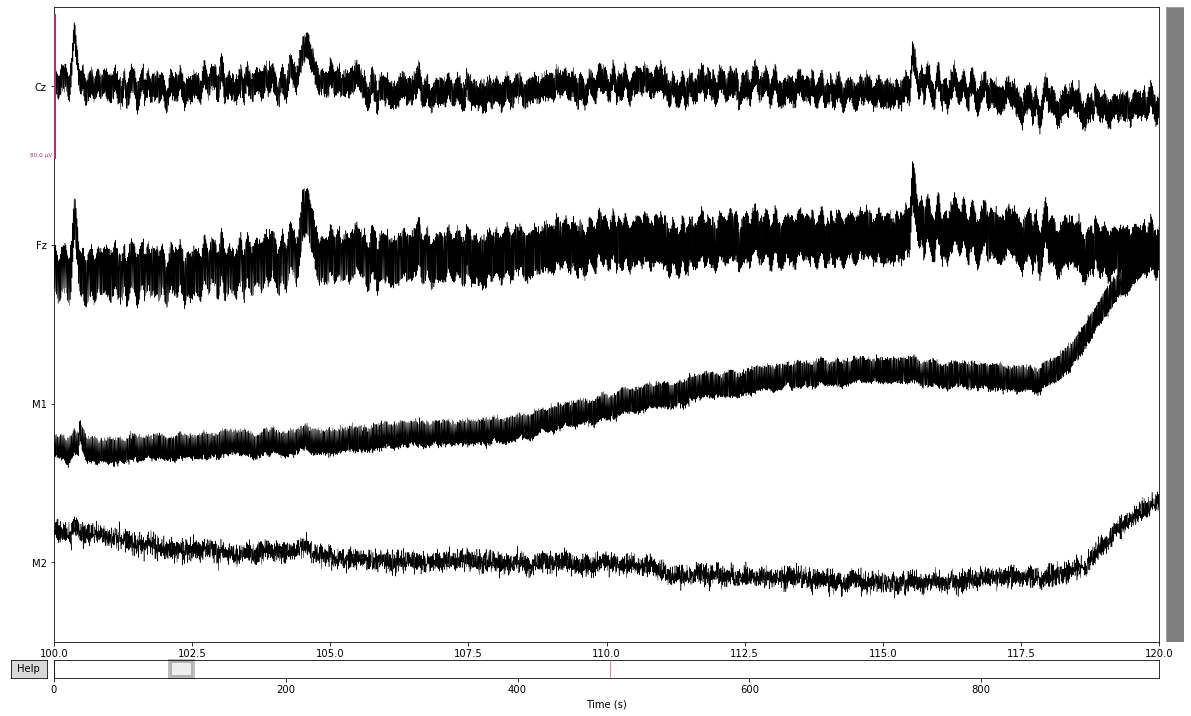

In [13]:
# Let's look at 20 seconds after 100 s of all the MEG and EEG channels
# Set the channel names of type eeg and meg
picks_eeg = raw.copy().pick_types(eeg=True, meg=False)
picks_meg = raw.copy().pick_types(meg=True, eeg=False)
# Create a dictionary with the scales for EEG (80 microV) and MEG (2000 ft)
scaling = dict(mag=1e-12, eeg=40e-6)

# Titles for plots
EEG = 'EEG channels'
MEG = 'MEG channels'

# Here is EEG ...
raw.copy().pick_channels(picks_eeg.ch_names).plot(start=100, duration=20, scalings=scaling, title=EEG);
# ... and here MEG
raw.copy().pick_channels(picks_meg.ch_names).plot(start=100, duration=20, scalings=scaling, title=MEG);

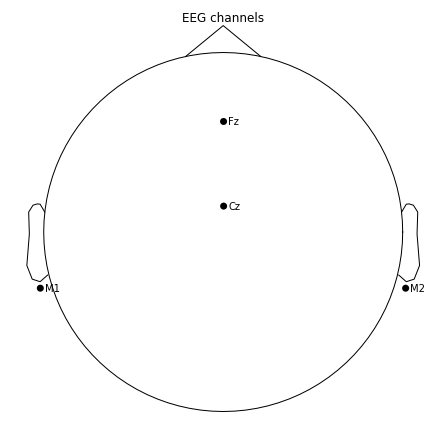

Removing 5 compensators from info because not all compensation channels were picked.


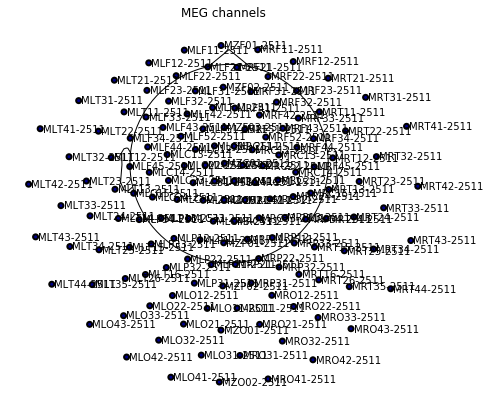

In [14]:
# Plot the sensor maps, again for both ...
# ... EEG ...
raw.plot_sensors(kind='topomap', ch_type='eeg', show_names=True, title=EEG);
# ... and MEG
raw.plot_sensors(kind='topomap', ch_type='mag', show_names=True, title=MEG);

## Event structure

800 events found
Event IDs: [ 65536 131072 262144 327680 393216 458752 524288 589824]


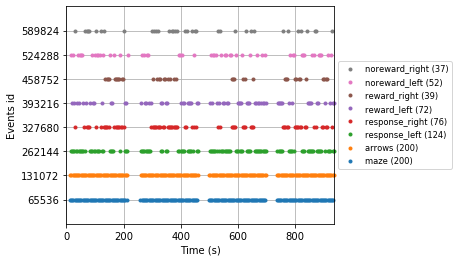

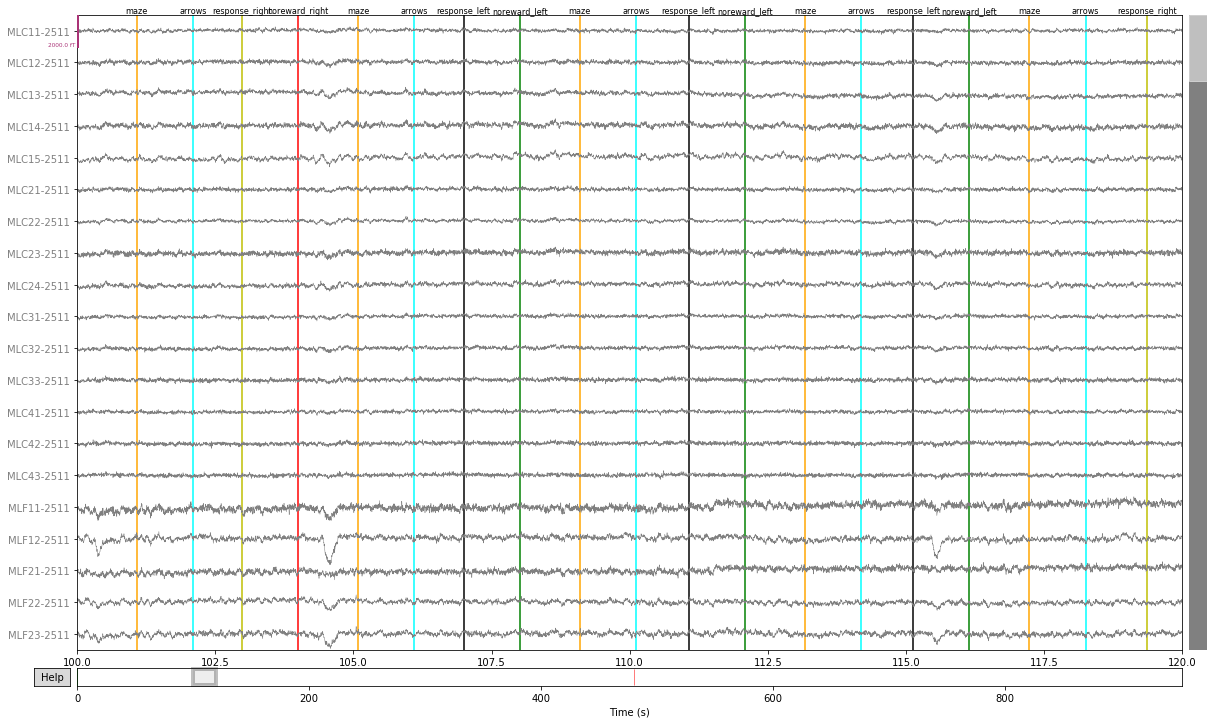

In [15]:
# First, build a dictionary of event ids
# This is my presumable event mapping based on frequencies I found
event_id = {'noreward_right': 589824, 'noreward_left': 524288, 'reward_right': 458752, 'reward_left': 393216,
            'response_right': 327680, 'response_left': 262144, 'arrows': 131072, 'maze': 65536}

# Read the events from the stimulus channel
events = mne.find_events(raw, stim_channel='STIM', min_duration=.01)
# Plot all events across time
fig = mne.viz.plot_events(events, raw.info['sfreq'],
                          event_id=event_id, first_samp=raw.first_samp)
fig.subplots_adjust(right=0.7)

# Let's see that in the raw data (again after 100 s for 20 s)
raw.plot(events=events, start=100, duration=20, color='gray', event_id=event_id,
         event_color={589824: 'r', 524288: 'g', 458752: 'b', 393216: 'm', 327680: 'y', 262144: 'k',
                      131072: 'cyan', 65536: 'orange'});

## Pre-processing

### Review artifacts

Effective window size : 3.413 (s)
Effective window size : 3.413 (s)


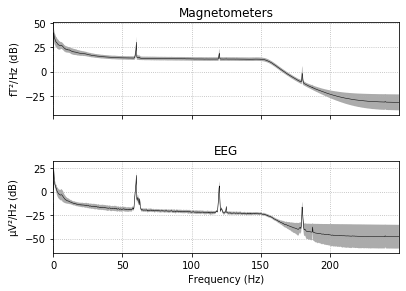

In [18]:
# For a start, plotting two types of prevalent artifacts
# Starting with power line noise (persistent oscillations centered around 
# AC power line frequency (typically around 50 Hz and 60 Hz)
# Plot the power spectral density with arrows pointing to likely power line noise
fig = raw.plot_psd(tmax=np.inf, fmax=250, average=True)
for ax in fig.axes[:2]:
    freqs = ax.lines[-1].get_xdata()
    psds = ax.lines[-1].get_ydata()
    for freq in (60, 120, 180, 240):
        idx = np.searchsorted(freqs, freq)
        ax.arrow(x=freqs[idx], y=psds[idx] + 18, dx=0, dy=-12, color='red',
                 width=0.1, head_width=3, length_includes_head=True)

EOG channel index for this subject is: [189 190]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 6000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 200 significant peaks
Number of EOG events detected : 200
Not setting metadata
Not setting metadata
200 matching events found
Applying baseline correction (mode: mean)
Loading data for 200 events and 601 original time points ...
2 bad epochs dropped
No projector specified for this dataset. Please consider the method sel

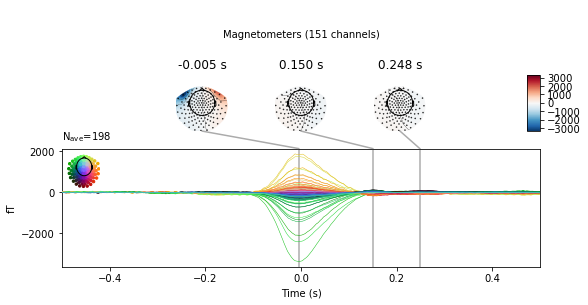

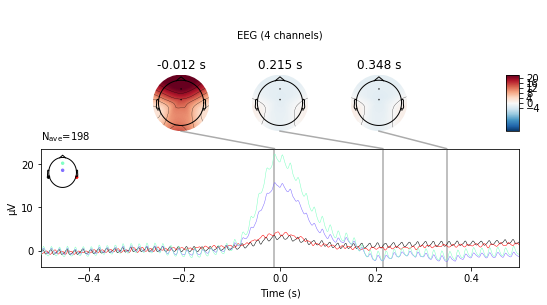

[<Figure size 576x302.4 with 7 Axes>, <Figure size 576x302.4 with 7 Axes>]

In [19]:
# Next, let's look at ocular artifacts as evident from the EOG (channels are automatically detected if channel types have been defined correctly)
eog_epochs = mne.preprocessing.create_eog_epochs(raw, baseline=(-0.5, -0.2))
eog_epochs.average().plot_joint()

### Filtering and ICA

Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1981 samples (3.302 sec)

Effective window size : 3.413 (s)
Effective window size : 3.413 (s)


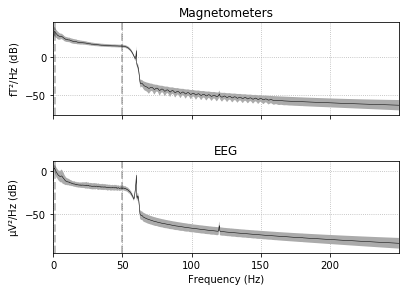

In [20]:
# To tackle the first problem (power line noise and slow drifts), filter the data
# Low pass = 50 Hz
# High pass = 1 Hz
filter_raw = raw.copy()
filter_raw.filter(l_freq=1, h_freq=50, fir_window='hamming', method='fir')
# Create the same plot from before (dotted lines indicate filter low pass cut-off)
fig = filter_raw.plot_psd(tmax=np.inf, fmax=250, average=True)
for ax in fig.axes[:2]:
    freqs = ax.lines[-1].get_xdata()
    psds = ax.lines[-1].get_ydata()
    for freq in (60, 120, 180, 240):
        idx = np.searchsorted(freqs, freq)
        ax.arrow(x=freqs[idx], y=psds[idx] + 18, dx=0, dy=-12, color='red',
                 width=0.1, head_width=3, length_includes_head=True)

In [21]:
# For the ocular artifacts, employ an ICA correction approach
# Set parameters for ICA
n_components = 15
method='infomax'
allow_ref_meg = False

ica = ICA(n_components=n_components, method=method, allow_ref_meg=allow_ref_meg)
ica.fit(filter_raw)

Fitting ICA to data using 155 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Removing 5 compensators from info because not all compensation channels were picked.
Removing 5 compensators from info because not all compensation channels were picked.
Selecting by number: 15 components
 


/Users/maltegueth/anaconda3/envs/mne/lib/python3.8/site-packages/mne/preprocessing/infomax_.py:192: RuntimeWarning: overflow encountered in exp
  y = 1.0 / (1.0 + np.exp(-u))


Fitting ICA took 117.4s.


<ICA | raw data decomposition, fit (infomax): 572004 samples, 15 components, channels used: "mag"; "eeg">

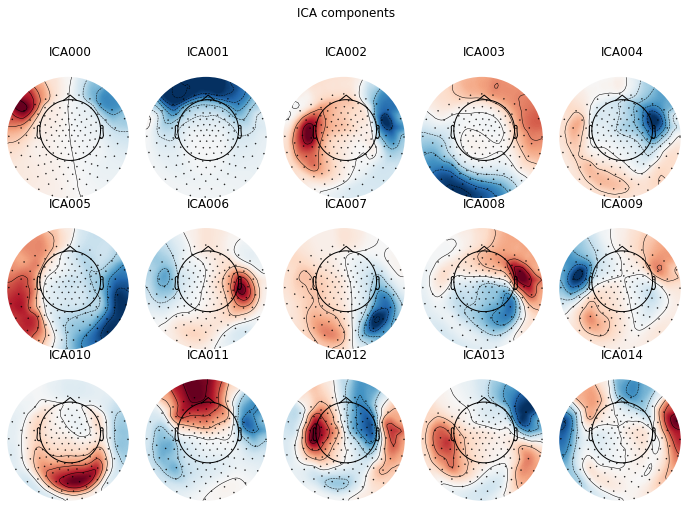

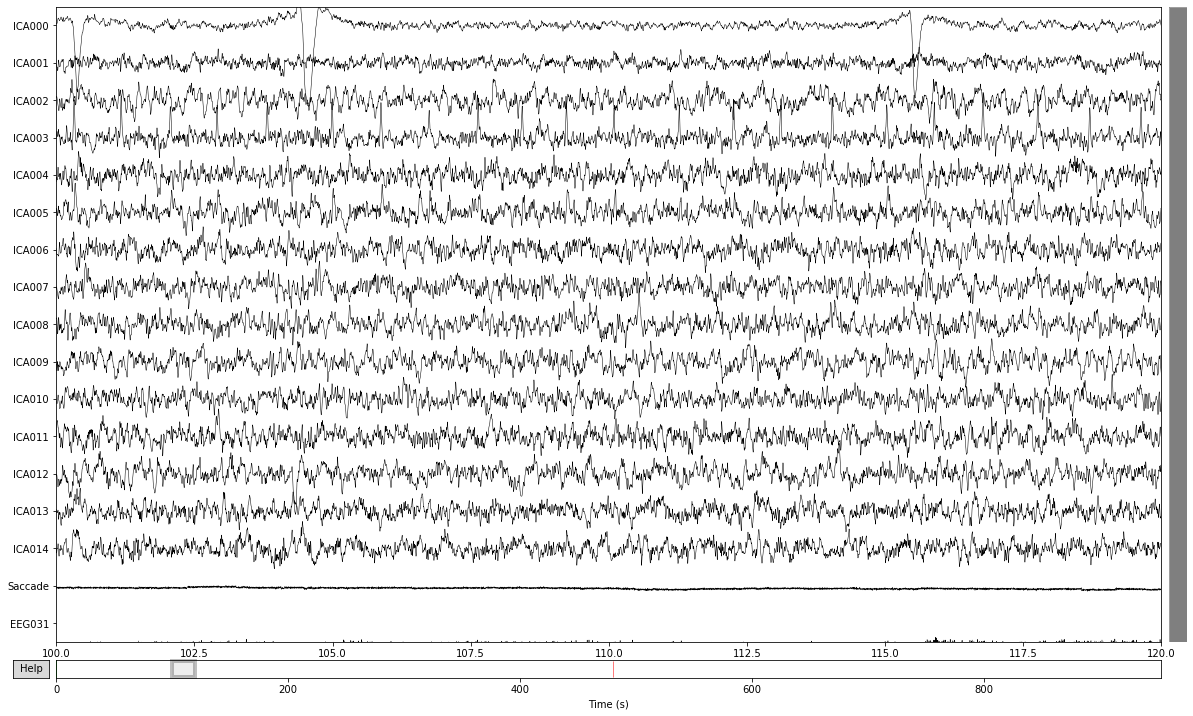

In [22]:
# Plot all ica components as topomaps and their respective time course contributions
ica.plot_components()
ica.plot_sources(filter_raw, start=100);

From these two plots we can infer that component 0 likely reflects saccades, component 1 blinks and component 3 QRS cycles/heartbeats: 

1) Comp 0 has a bipolar distribution with negative and positive poles outside of the head on the left and right in front of the eyes. Time course looks a little more like blinks. 

2) Comp 1 shows a negative pole right in front of the eyes (other pole likely below). 

3) Comp 3 time course has sharp, large peaks with small ripples surrounding them (QRS like shape). The topography shows a negative-positive split across the head as typical for heartbeat artifacts.

Transforming to ICA space (15 components)
Zeroing out 1 ICA component


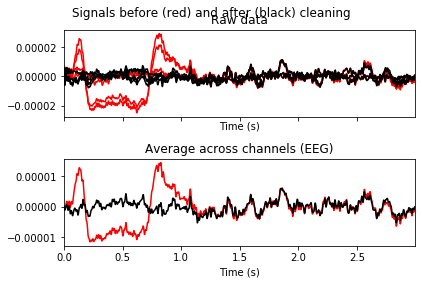

Transforming to ICA space (15 components)
Zeroing out 1 ICA component


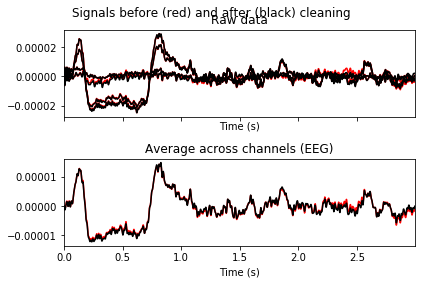

Transforming to ICA space (15 components)
Zeroing out 1 ICA component


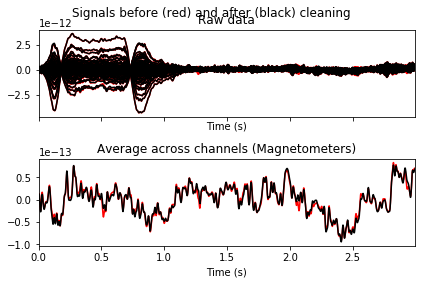

In [23]:
# We can plot the back-projected data excluding these components on the filtered raw signal with those components
# Here, black shows the signal after back-projection and red before

# Saccades on EEG (the red part clearly shows we'd be removing 
# typical step-like deflections due horizontal eye movements)
ica.plot_overlay(filter_raw, exclude=[0], picks='eeg');
# Blinks on EEG
ica.plot_overlay(filter_raw, exclude=[1], picks='eeg');
# Heartbeats on MEG
ica.plot_overlay(filter_raw, exclude=[3], picks='mag');

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
476 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
476 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
476 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


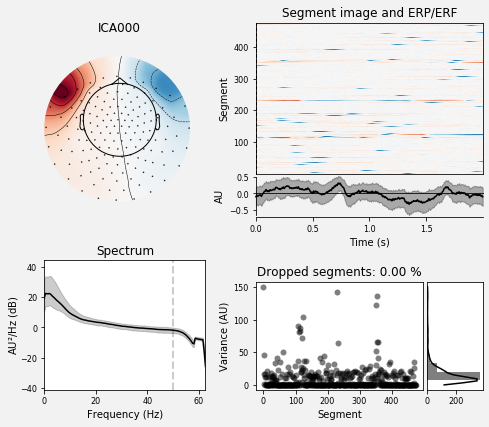

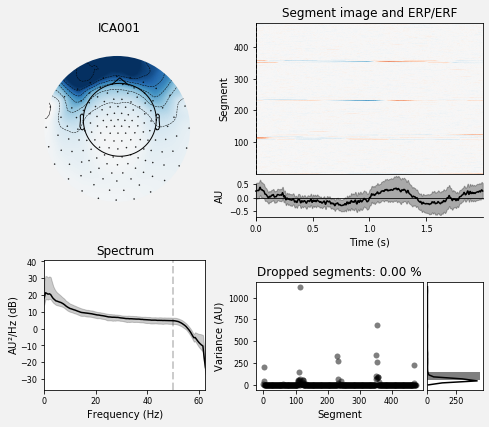

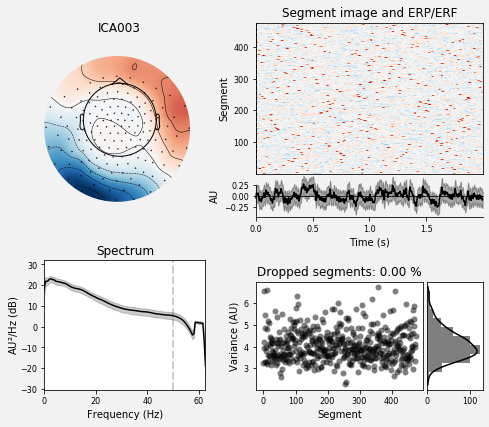

[<Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>]

In [24]:
# To be sure, we can look at exact details of these components
ica.plot_properties(filter_raw, picks=[0, 1, 3])

Transforming to ICA space (15 components)
Zeroing out 3 ICA components


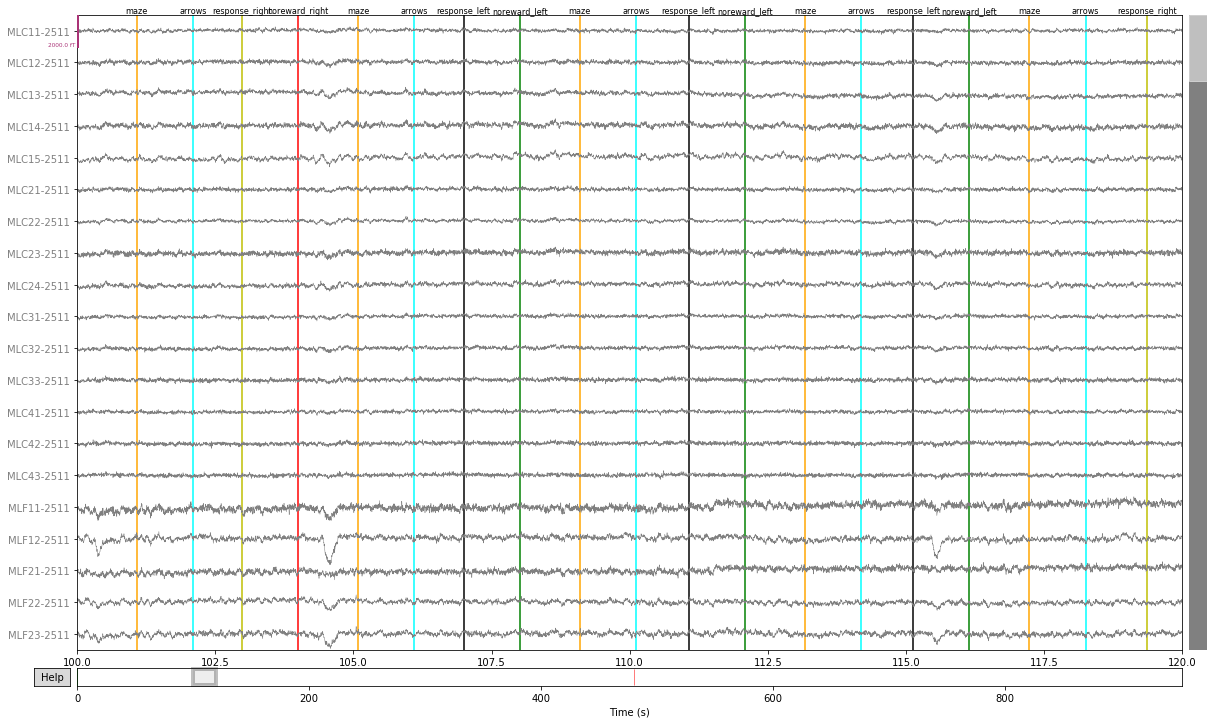

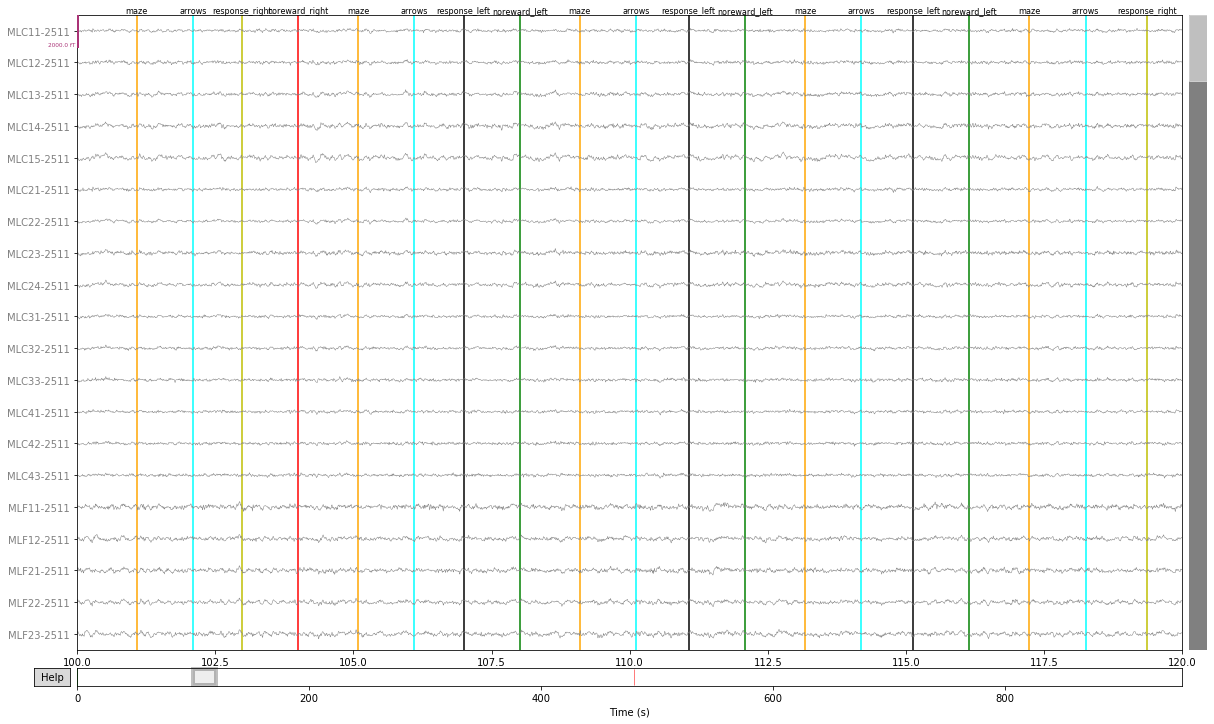

In [25]:
# Now we can remove these components before back-projecting the components to continuous data
ica.exclude = [0,1,3]

# Look at the raw data again after filtering and ICA
reconst_raw = filter_raw.copy()
ica.apply(reconst_raw)

raw.plot(events=events, start=100, duration=20, color='gray', event_id=event_id, scalings=dict(mag=1e-12, eeg=20e-6),
                event_color={589824: 'r', 524288: 'g', 458752: 'b', 393216: 'm', 327680: 'y', 262144: 'k',
                             131072: 'cyan', 65536: 'orange'});
reconst_raw.plot(events=events, start=100, duration=20, color='gray', event_id=event_id, scalings=dict(mag=1e-12, eeg=20e-6),
                event_color={589824: 'r', 524288: 'g', 458752: 'b', 393216: 'm', 327680: 'y', 262144: 'k',
                             131072: 'cyan', 65536: 'orange'});

### Automatic artifact component detection

In [26]:
# The same procedure can be applied using an automatic detection ICA-approach
# Build an empty list for component indices to be excluded
ica.exclude = []

# Test which components match the EOG pattern
eog_indices, eog_scores = ica.find_bads_eog(raw)
ica.exclude = eog_indices

... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 6000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 6000 s

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
476 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
476 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


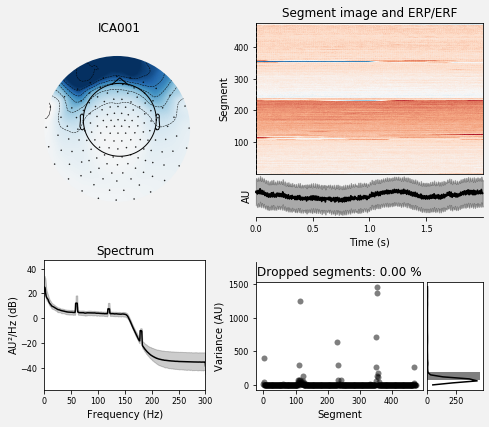

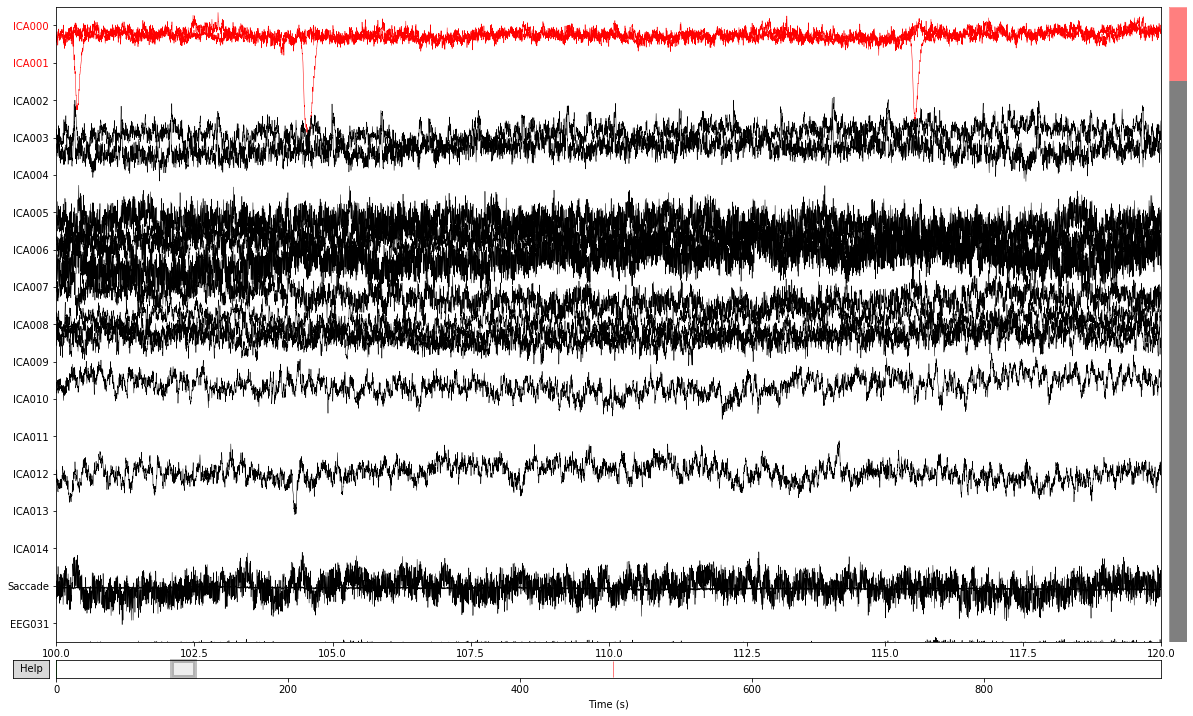

In [27]:
# Plot the component artifact scores along with component properties and averaged raw data around EOG events with the best matching component excluded
ica.plot_scores(eog_scores);
ica.plot_properties(raw, picks=eog_indices);
ica.plot_sources(raw, start=100);
ica.plot_sources(eog_epochs.average());

# Segmentation and averaged ERPs

## Referencing and segmentation

In [28]:
# Rereference to the mastoids
reconst_raw.set_eeg_reference(ref_channels=['M1', 'M2'])
# Segment the data
epochs = mne.Epochs(reconst_raw, events, event_id, tmin=-.2, tmax=.8, baseline=None)

EEG channel type selected for re-referencing
Applying a custom EEG reference.
Not setting metadata
Not setting metadata
800 matching events found
No baseline correction applied
0 projection items activated


In [29]:
# Average reward and no reward segments
left = epochs['noreward_left', 'reward_left'].average()
right = epochs['noreward_right', 'reward_right'].average()

reward = epochs['reward_right', 'reward_left'].average()
noreward = epochs['noreward_right', 'noreward_left'].average()

# Filter these a little more strictly
reward = reward.filter(1, 20)
noreward = noreward.filter(1, 20)

left = left.filter(1, 20)
right = right.filter(1, 20)

Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 1981 samples (3.302 sec)

Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- F

<ipython-input-29-28299a643444>:9: RuntimeWarning: filter_length (1981) is longer than the signal (601), distortion is likely. Reduce filter length or filter a longer signal.
  reward = reward.filter(1, 20)
<ipython-input-29-28299a643444>:10: RuntimeWarning: filter_length (1981) is longer than the signal (601), distortion is likely. Reduce filter length or filter a longer signal.
  noreward = noreward.filter(1, 20)
<ipython-input-29-28299a643444>:12: RuntimeWarning: filter_length (1981) is longer than the signal (601), distortion is likely. Reduce filter length or filter a longer signal.
  left = left.filter(1, 20)


Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 1981 samples (3.302 sec)



<ipython-input-29-28299a643444>:13: RuntimeWarning: filter_length (1981) is longer than the signal (601), distortion is likely. Reduce filter length or filter a longer signal.
  right = right.filter(1, 20)


## Plotting topographies

In [43]:
# First, change the default matplotlib font size
import matplotlib

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

Applying baseline correction (mode: mean)
No projector specified for this dataset. Please consider the method self.add_proj.
Removing 5 compensators from info because not all compensation channels were picked.


Applying baseline correction (mode: mean)
No projector specified for this dataset. Please consider the method self.add_proj.
Removing 5 compensators from info because not all compensation channels were picked.


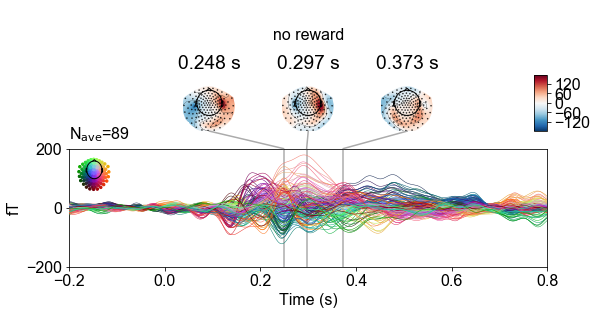

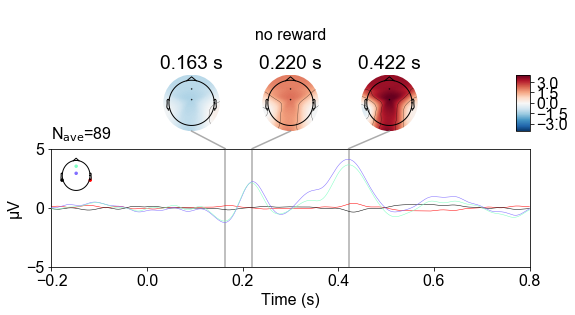

Applying baseline correction (mode: mean)
No projector specified for this dataset. Please consider the method self.add_proj.
Removing 5 compensators from info because not all compensation channels were picked.


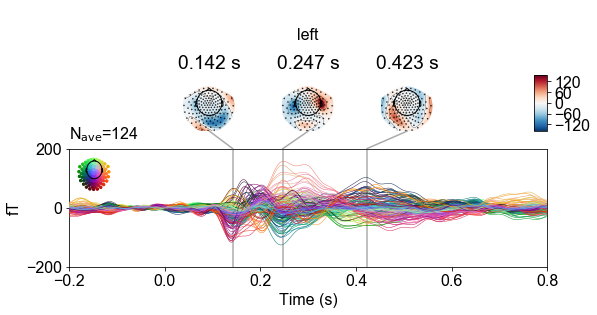

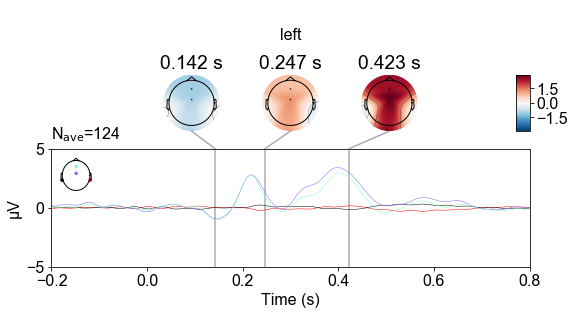

Applying baseline correction (mode: mean)
No projector specified for this dataset. Please consider the method self.add_proj.
Removing 5 compensators from info because not all compensation channels were picked.


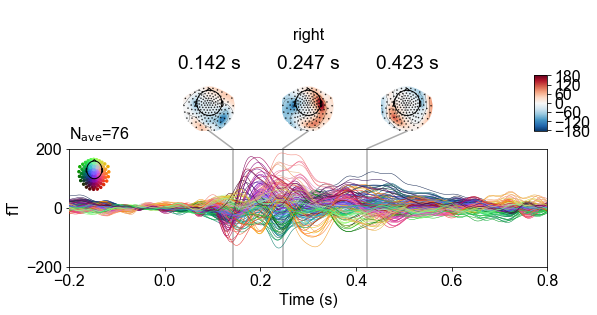

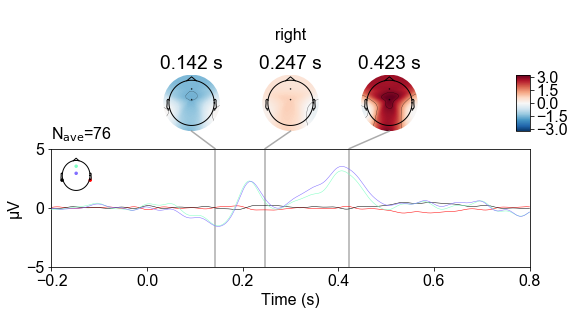

[<Figure size 576x302.4 with 7 Axes>, <Figure size 576x302.4 with 7 Axes>]

In [63]:
# Plot the baseline corrected (-100 ms to 0 ms) subject average
ts_args = dict(units = dict(eeg='µV', mag='fT'), ylim = dict(eeg=[-5, 5], mag=[-200, 200]))

reward.apply_baseline(baseline=[-.1,0]).plot_joint(title='reward', ts_args=ts_args)
noreward.apply_baseline(baseline=[-.1,0]).plot_joint(title='no reward', ts_args=ts_args)

left.apply_baseline(baseline=[-.1,0]).plot_joint(title='left', times=[.142, .247, .423], ts_args=ts_args)
right.apply_baseline(baseline=[-.1,0]).plot_joint(title='right', times=[.142, .247, .423], ts_args=ts_args)

## Plotting channels

In [45]:
# Create a difference wave for reward and no reward in both EEG and MEG
diff = mne.combine_evoked(
    [reward.apply_baseline(baseline=[-.1,0]), noreward.apply_baseline(baseline=[-.1,0])], [-1,1])

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


In [57]:
# Set some plotting parameters

colors = dict(Reward = 'darkblue', NoReward = 'darkred', Difference = 'black') 

ERPs = {'Reward': reward, 'NoReward': noreward, 'Difference': diff} 

linestyles = dict(Reward = '-', NoReward = '-', Difference = '-') 

ylim = dict(eeg=[-5,5], mag=[-200, 200])

Removing 5 compensators from info because not all compensation channels were picked.
Removing 5 compensators from info because not all compensation channels were picked.


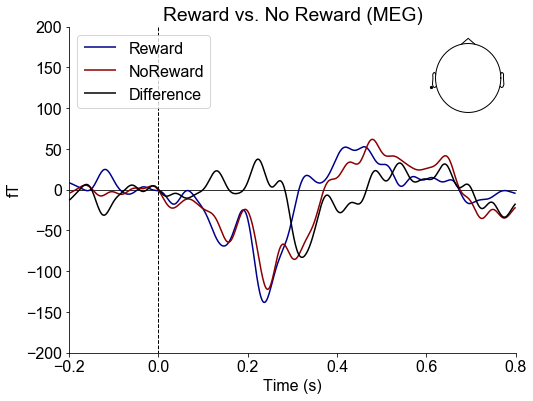

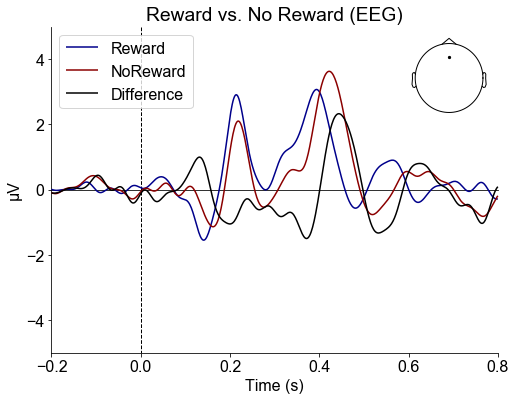

[<Figure size 576x432 with 2 Axes>]

In [58]:
# Plot Fz and an MEG channel of interest
mne.viz.plot_compare_evokeds(ERPs, picks=['MLT13-2511'], 
                             truncate_yaxis=False, truncate_xaxis=False,
                             colors=colors, linestyles=linestyles,
                             invert_y=False, ylim = ylim,
                             title='Reward vs. No Reward (MEG)',
                             show_sensors=True)

mne.viz.plot_compare_evokeds(ERPs, picks=['Fz'], 
                             truncate_yaxis=False, truncate_xaxis=False,
                             colors=colors, linestyles=linestyles,
                             invert_y=False, ylim = ylim,
                             title='Reward vs. No Reward (EEG)',
                             show_sensors=True)

Removing 5 compensators from info because not all compensation channels were picked.
Removing 5 compensators from info because not all compensation channels were picked.


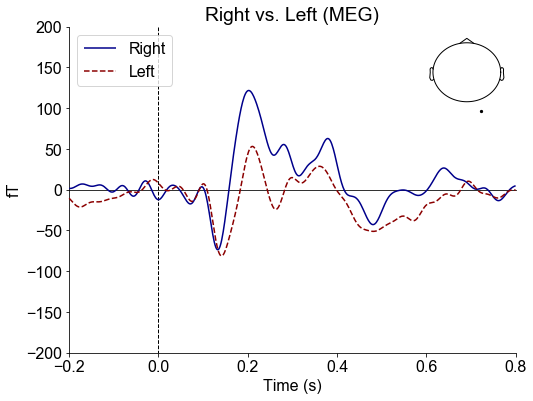

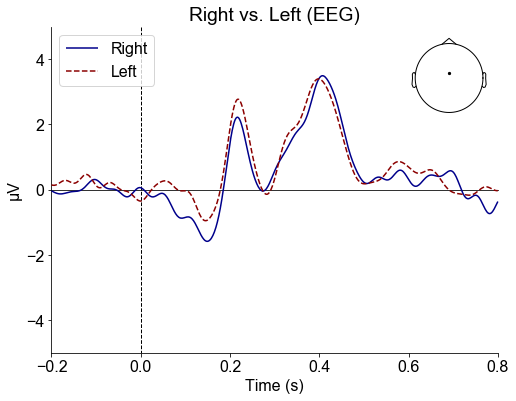

[<Figure size 576x432 with 2 Axes>]

In [67]:
# Plot the same for Left and Right

colors = dict(Right = 'darkblue', Left = 'darkred') 

ERPs = {'Right': right, 'Left': left} 

linestyles = dict(Right = '-', Left = '--')

mne.viz.plot_compare_evokeds(ERPs, picks=['MRO12-2511'], 
                             truncate_yaxis=False, truncate_xaxis=False,
                             colors=colors, linestyles=linestyles,
                             invert_y=False, ylim = ylim,
                             title='Right vs. Left (MEG)',
                             show_sensors=True)

mne.viz.plot_compare_evokeds(ERPs, picks=['Cz'], 
                             truncate_yaxis=False, truncate_xaxis=False,
                             colors=colors, linestyles=linestyles,
                             invert_y=False, ylim = ylim,
                             title='Right vs. Left (EEG)',
                             show_sensors=True)